In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

data=pd.read_csv("cc_general.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Preprocessing

In [2]:
data=data.drop("CUST_ID",axis=1)
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
#replace missing values

data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace=True)
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)

In [4]:
scaler=StandardScaler()
data=scaler.fit_transform(data)
data=normalize(data)
data=pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-2.250182e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146893,0.103128,-0.066344,-0.071050,-0.026403,-0.092916,0.252770,-0.135091,0.234852,-0.134432,-0.094764,-0.069751,-0.191180,-0.096784,-6.964046e-02,0.235672,-0.820660
8946,-0.151521,0.105735,-0.067173,-0.072846,-0.025067,-0.095266,0.259162,-0.138507,0.240791,-0.137832,-0.097161,-0.071515,-0.196014,-0.102738,-1.095171e-16,-0.107259,-0.841413
8947,-0.156974,-0.039324,-0.085222,-0.075675,-0.062521,-0.098965,0.181181,-0.143885,0.161230,-0.143183,-0.100933,-0.082821,-0.203625,-0.120978,-7.112317e-02,0.069795,-0.874082
8948,-0.154320,-0.038411,-0.097240,-0.073918,-0.094139,-0.093057,-0.253016,-0.140545,-0.189902,0.032623,-0.037897,-0.122556,-0.227357,-0.120224,-7.184155e-02,0.068175,-0.853792


In [5]:
pca=PCA(n_components=2)
data=pca.fit_transform(data)
data=pd.DataFrame(data)
data

,0,1
0,-0.489826,-0.679678
1,-0.518792,0.545016
2,0.330885,0.268977
3,-0.482373,-0.092113
4,-0.563289,-0.481914
...,...,...
8945,0.328718,-0.198545
8946,0.259862,-0.167660
8947,0.188798,-0.248498
8948,-0.313018,-0.171384


# Hierarchical clustering  

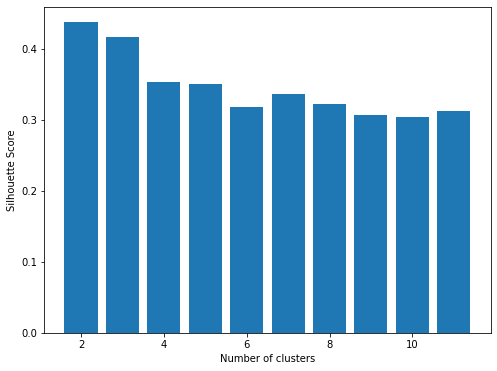

In [6]:
clusters=[]
for i in range(2,12):
    clusters.append(silhouette_score(data,AgglomerativeClustering(n_clusters=i , linkage='ward').fit_predict(data)))
plt.figure(figsize=(8,6))
plt.bar(range(2,12), clusters)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

In [7]:
agg=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clust_labels=agg.fit_predict(data)

In [8]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,1
3,0
4,0
...,...
8945,1
8946,1
8947,1
8948,0


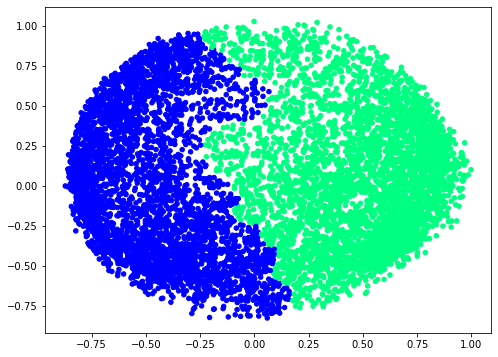

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(data.iloc[:,0], data.iloc[:,1],c=agglomerative,s=20, cmap=plt.cm.winter) 
plt.show()

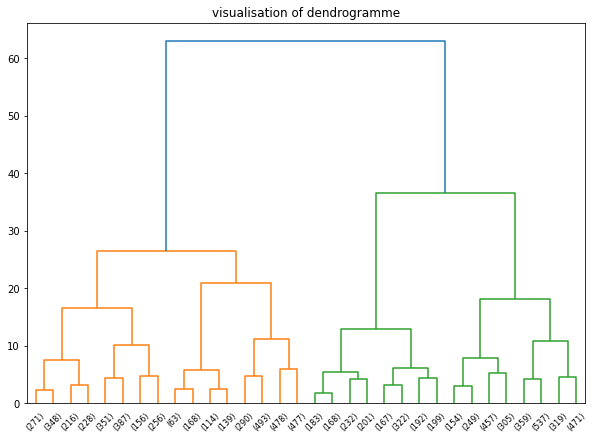

In [10]:
plt.figure(figsize=(10,7))
plt.title("visualisation of dendrogramme")
dend=shc.dendrogram(shc.linkage(data, method ='ward'),truncate_mode='level', p=4)

# k-means clustering

In [11]:
from sklearn.cluster import KMeans

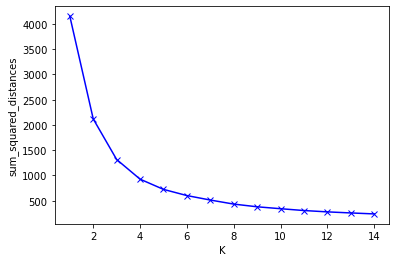

In [12]:
sum_squared_distances=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km.fit(data)
    sum_squared_distances.append(km.inertia_)
    
    
plt.plot(K,sum_squared_distances,"bx-")
plt.xlabel("K")
plt.ylabel("sum_squared_distances")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [14]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,2
2,1
3,0
4,0
...,...
8945,1
8946,1
8947,1
8948,0


In [15]:
prediction=kmeans.predict(data)
print(kmeans.cluster_centers_)

[[-0.4189471  -0.31093025]
 [ 0.54648939 -0.0287984 ]
 [-0.35362267  0.54252063]]


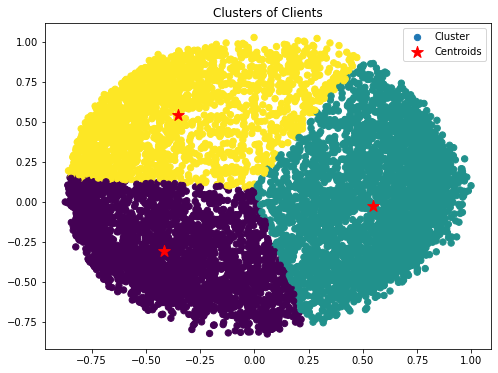

In [16]:
plt.figure(figsize=(8,6))

plt.scatter(data[0],data[1],s=40,c=labels,label='Cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', marker='*', label = 'Centroids')

plt.title("Clusters of Clients")
plt.legend()
plt.show()

## Comparison

<b>From the 2 results, we can notice that there is a difference in the number of clusters that come from the validation methods used for each algorithm but also the population that each cluster represents. For k-means clustering, we used the ELBOW method which makes it possible to find the most optimal number of clusters according to the sum of the squared distances on the other hand for hierarchical clustering we use silhouette score which will give us a score between 0 and 1 (the higher the score, the better).<br>
We notice for hierarchical clustering, the 2 clusters do not represent the same percentage of the population against k-means clustering where we can see that the 3 clusters represent approximately the same percentage of the population.
So we can extract some conclusion that hierarchical clustering is fitting the data and it might bring to overfitting in comparison with k-means which just split the population into clusters regarding the distance between an observation and the center of the cluster.<br>
Also, those 2 methods have some issues with a big amount of data, they tend to overfit the data. </b>